#### https://www.kaggle.com/datasets/arezaei81/heartcsv

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [31]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- cp: chest pain type (4 wartości)
- trestbps: spoczynkowe ciśnienie krwi
- chol: cholesterol
- fbs: cukier we krwi na czczo
- restecg: spoczynkowe EKG
- thalach: maksymalne tetno
- exang: duszność spowodowana wysiłkiem ('yes' = 1, 'no' = 0)

In [32]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [33]:
X = df[df.columns[:-1]]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
y_pred = tree.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.7894736842105263

In [36]:
y_train.value_counts()

target
1    122
0    105
Name: count, dtype: int64

In [37]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

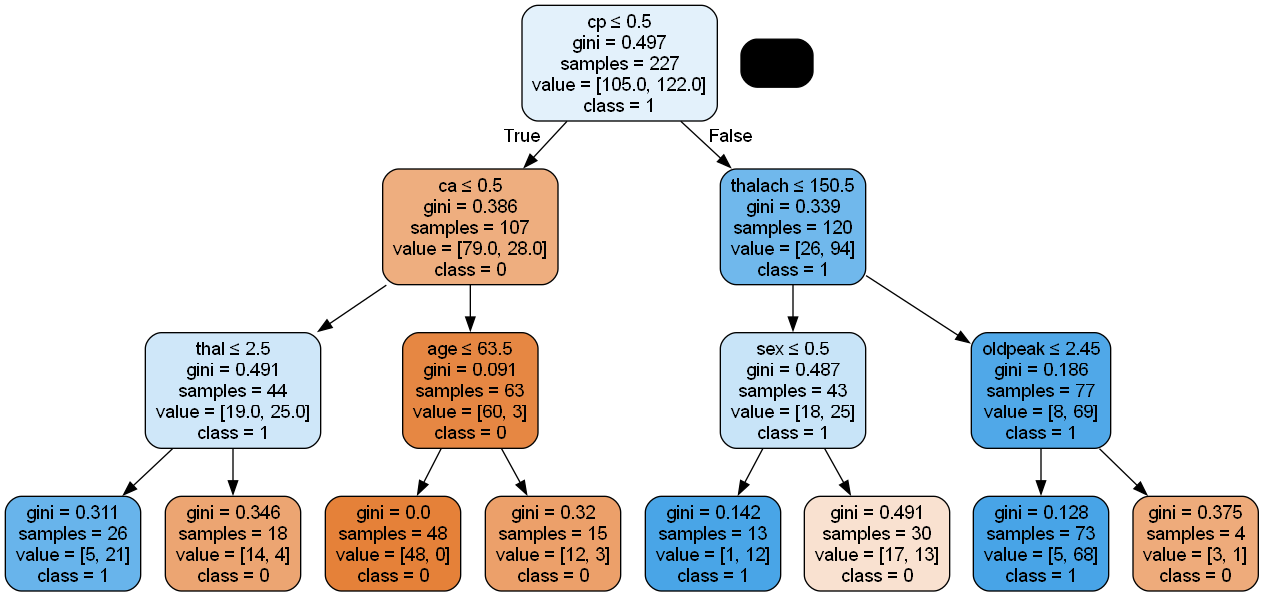

In [38]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=df.columns[:-1],
               class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [39]:
tree.feature_importances_

array([0.01377564, 0.06555315, 0.46383051, 0.        , 0.        ,
       0.        , 0.        , 0.08234835, 0.        , 0.0530753 ,
       0.        , 0.21155124, 0.1098658 ])

In [40]:
X.shape[1]

13

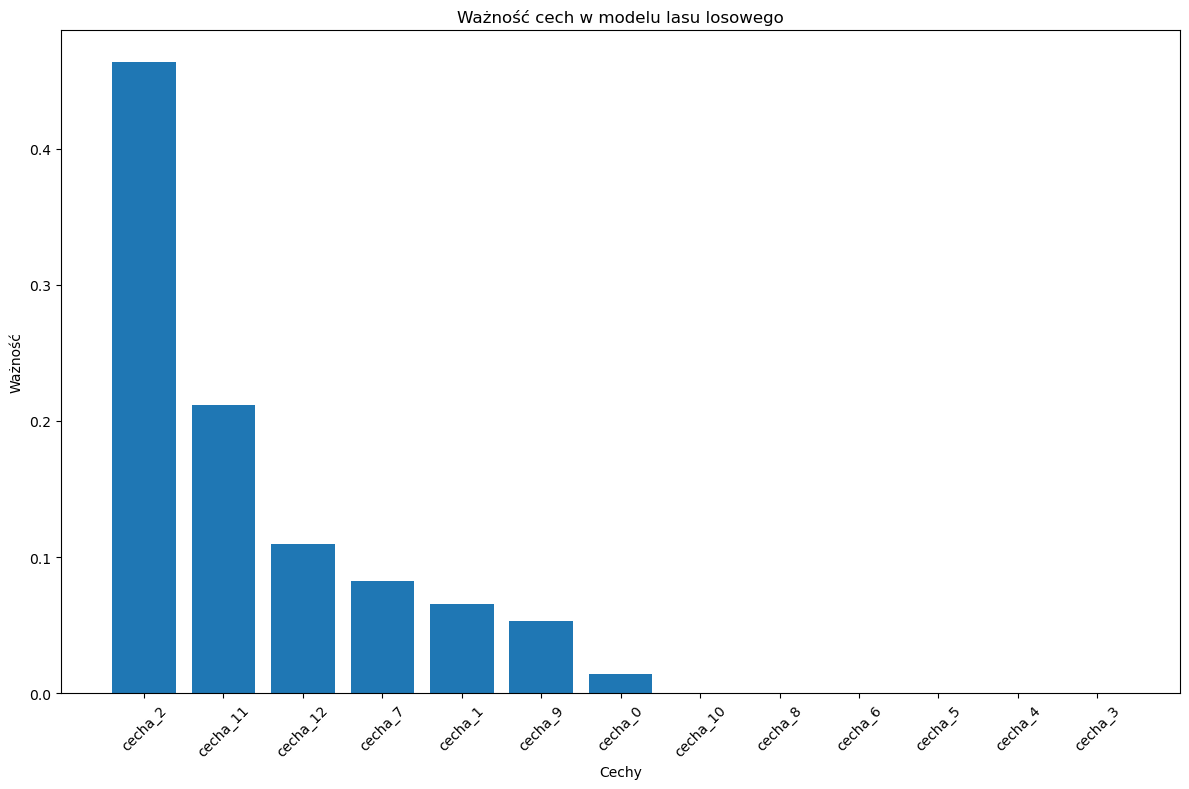

1. cecha_2 (0.463831)
2. cecha_11 (0.211551)
3. cecha_12 (0.109866)
4. cecha_7 (0.082348)
5. cecha_1 (0.065553)
6. cecha_9 (0.053075)
7. cecha_0 (0.013776)
8. cecha_10 (0.000000)
9. cecha_8 (0.000000)
10. cecha_6 (0.000000)
11. cecha_5 (0.000000)
12. cecha_4 (0.000000)
13. cecha_3 (0.000000)


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Nadanie nazw cechom dla lepszej czytelności
feature_names = [f'cecha_{i}' for i in range(X.shape[1])]


# Utworzenie i trenowanie modelu lasu losowego



# Pobranie ważności cech
importances = tree.feature_importances_

# Sortowanie cech według ważności
indices = np.argsort(importances)[::-1]

# Tworzenie wykresu
plt.figure(figsize=(12, 8))
plt.title("Ważność cech w modelu lasu losowego")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Cechy")
plt.ylabel("Ważność")
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

# Wypisanie ważności cech
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))